In [45]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import autocorrelation_plot

import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

### Import Data

In [3]:
df = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/Other/data/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [7]:
df = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/Other/data/MarketArrivals.csv')
df = df.loc[df.market == 'MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


### Visualising Time Series

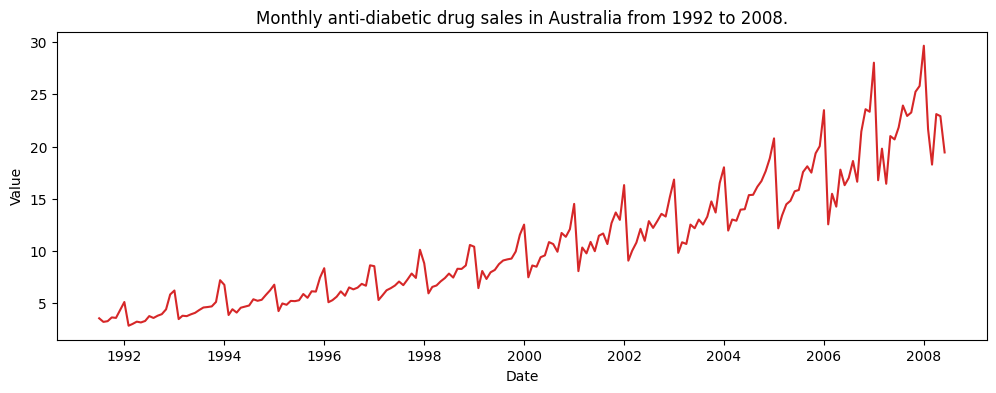

In [8]:
df = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/Other/data/a10.csv', parse_dates=['date'], index_col='date')

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(12,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title ='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

Seasonal Plot of a Time Series

/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_89919/1435661154.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, color=mycolors[i])
/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_89919/1435661154.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, color=mycolors[i])
/var/f

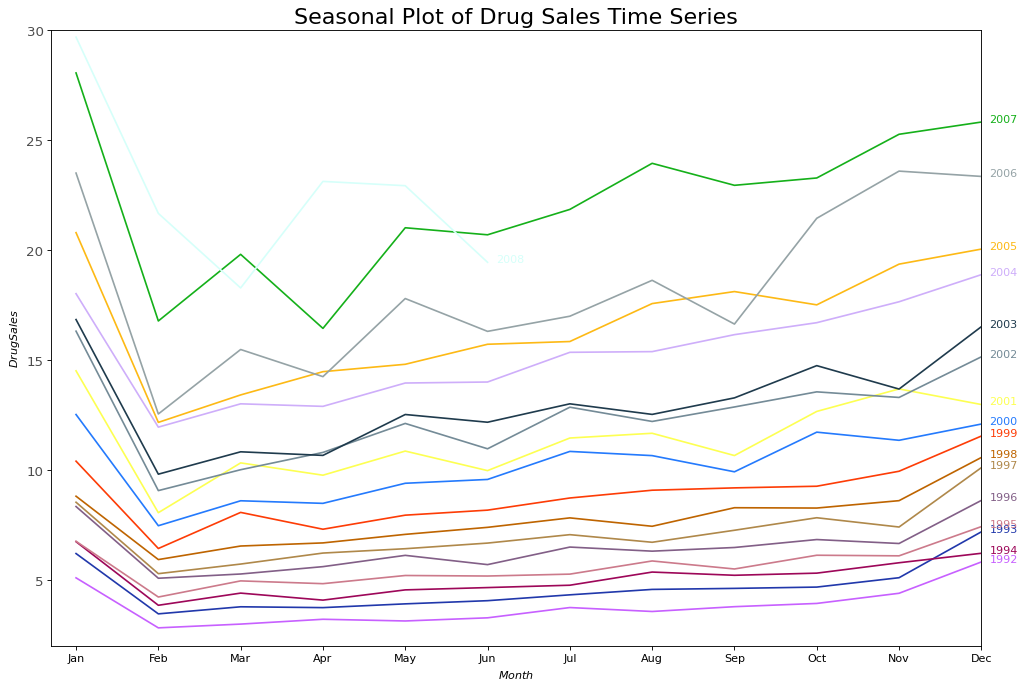

In [13]:
df.reset_index(inplace=True)
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

plt.figure(figsize=(15,10), dpi=80)
for i, y in enumerate(years):
    if i>0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, color=mycolors[i])

plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

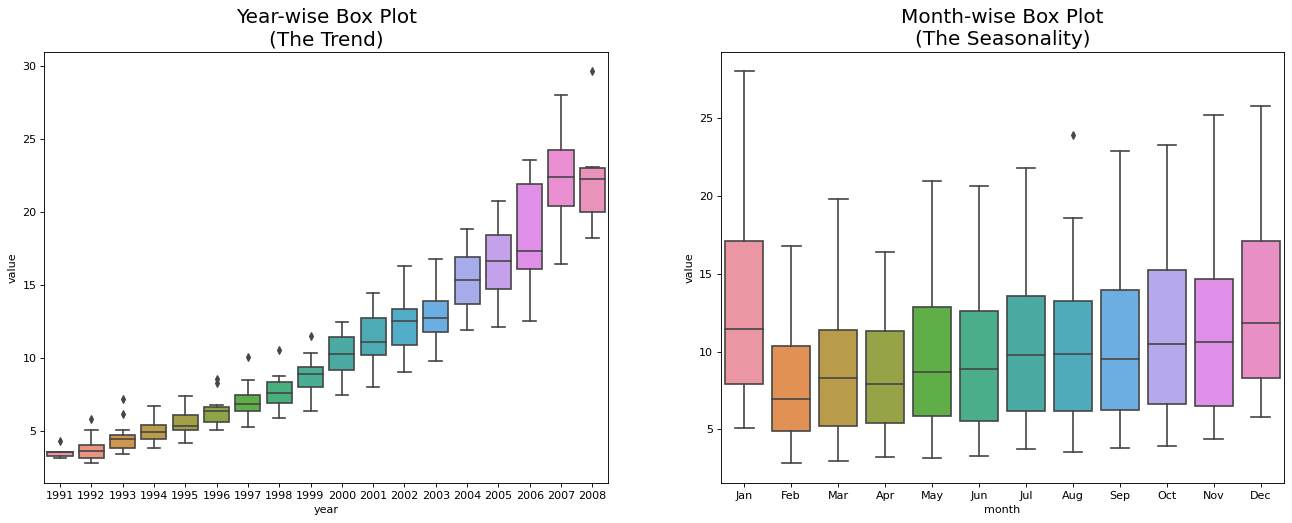

In [14]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Patterns in Time Series

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error\
A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. 

Additive time series:\
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:\
Value = Base Level x Trend x Seasonality x Error

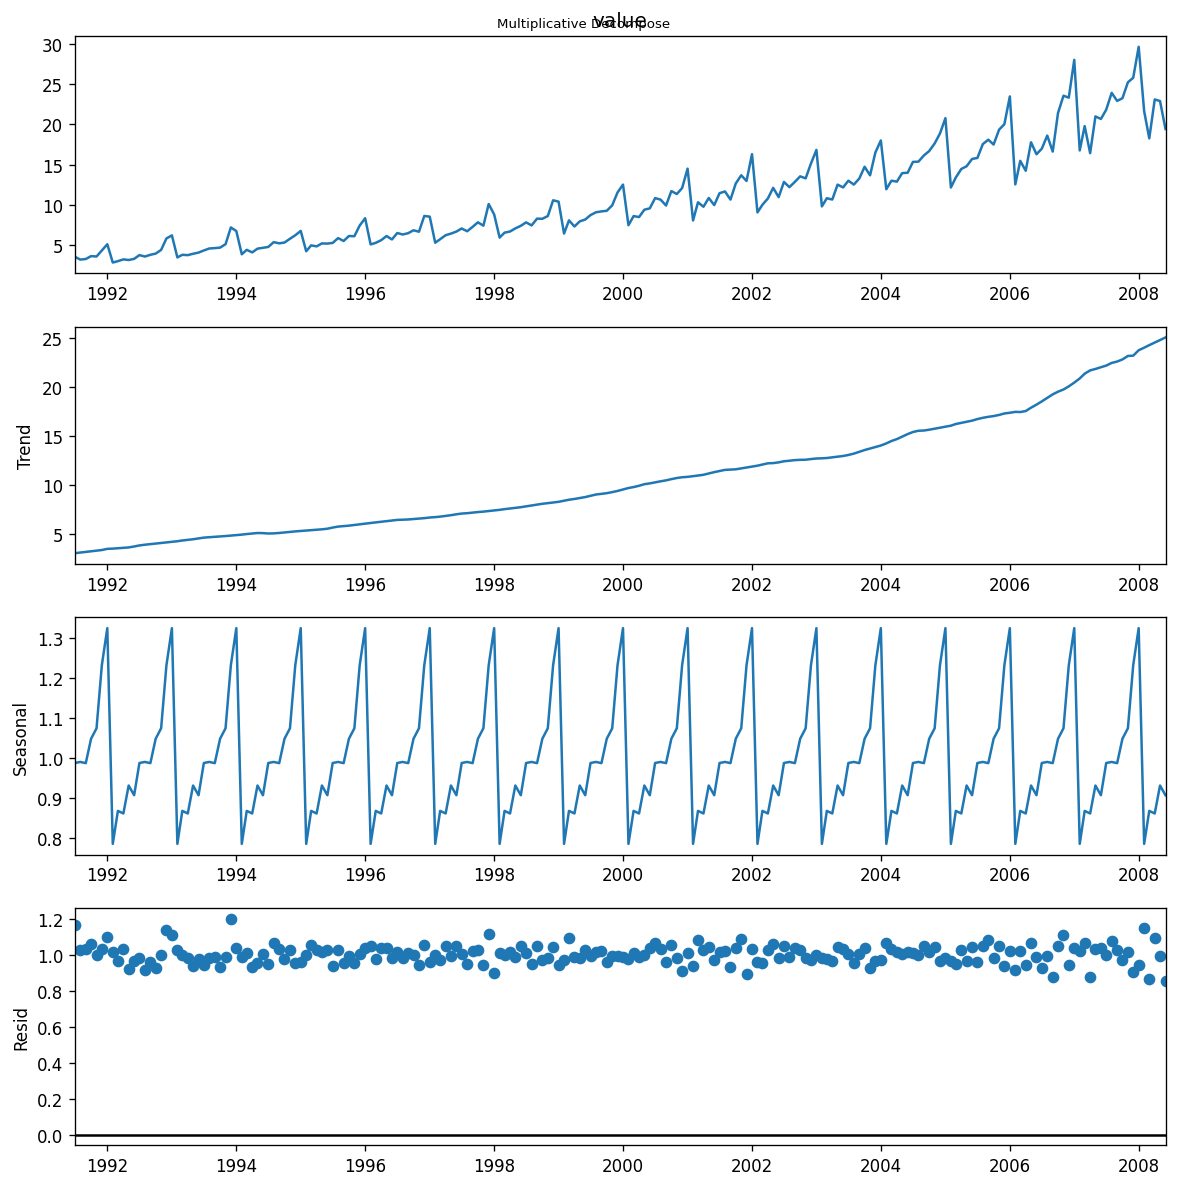

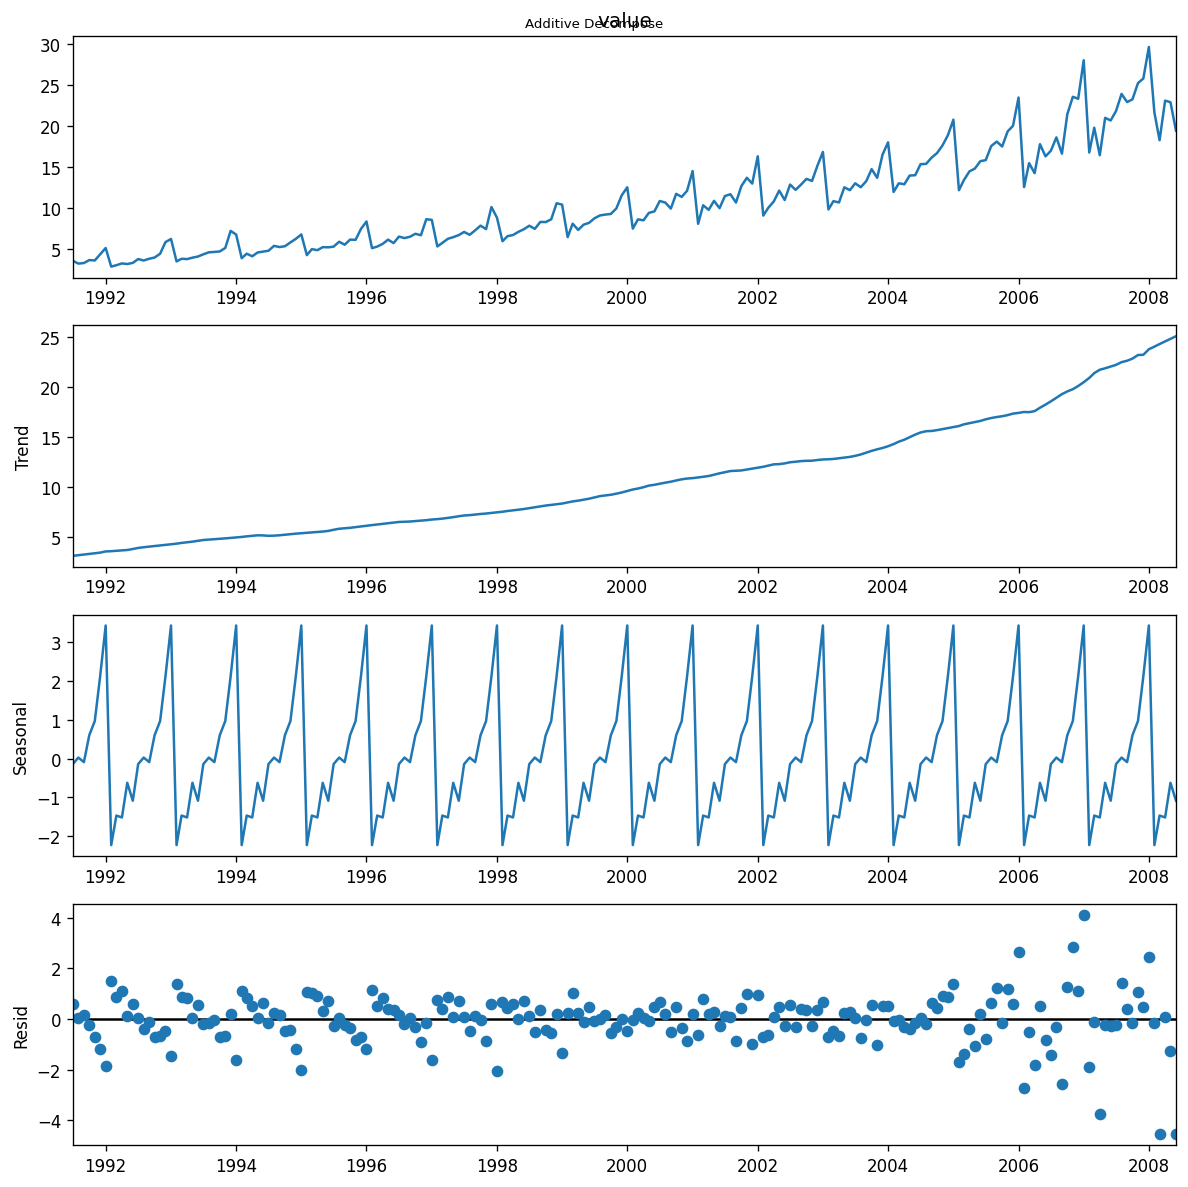

In [26]:
df = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/Other/data/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition
result_mult = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Aditive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mult.plot().suptitle('Multiplicative Decompose', fontsize=8)
result_add.plot().suptitle('Additive Decompose', fontsize=8)
plt.show()

If you look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

In [27]:
df_reconstructed = pd.concat([result_mult.seasonal, result_mult.trend, result_mult.resid, result_mult.observed], axis=1)
df_reconstructed.columns=['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


### Stationary and Non-Stationary Time Series

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. 

In [29]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067283
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/mcardonasanchez/Library/Python/3.11/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Detrend a Time Series

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

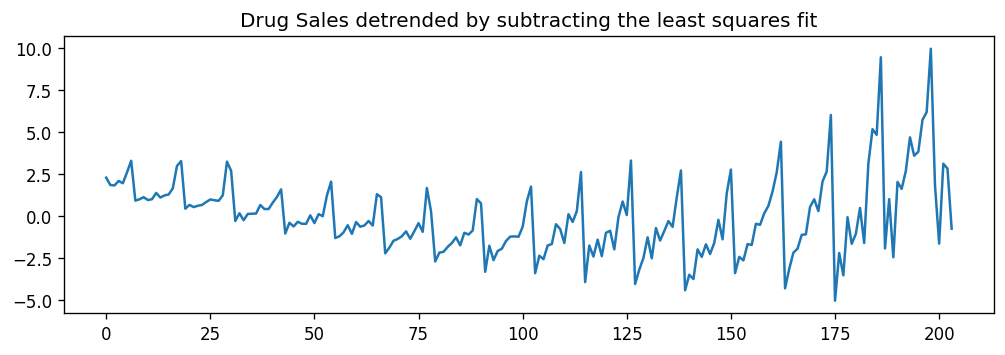

In [38]:
# Using scipy: Substract the line of best fit
detrended = signal.detrend(df.value.values)
plt.figure(figsize=(10,3))
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit')

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

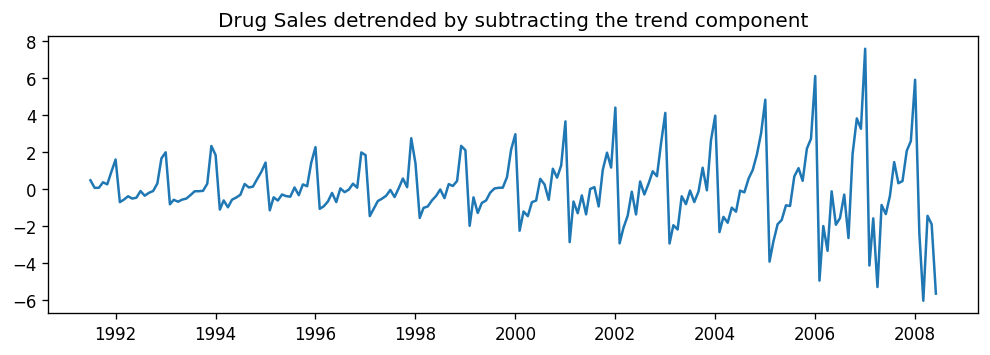

In [40]:
detrended = df.value.values - result_mult.trend
plt.figure(figsize=(10,3))
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component')

### Deseasonalise a Time Series

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

2. Seasonal difference the series (subtract the value of previous season from the current value)

3. Divide the series by the seasonal index obtained from STL decomposition

[]

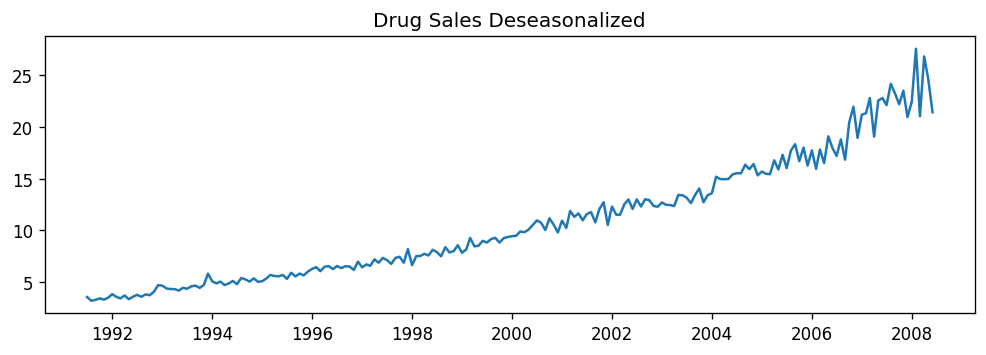

In [43]:
# Deseasonalize
deseasonalized = df.value.values / result_mult.seasonal

# Plot
plt.figure(figsize=(10,3))
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized')
plt.plot()

### Test for seasonality

When there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

For example, the drug sales time series is a monthly series with patterns repeating every year. So, you can see spikes at 12th, 24th, 36th.. lines.

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

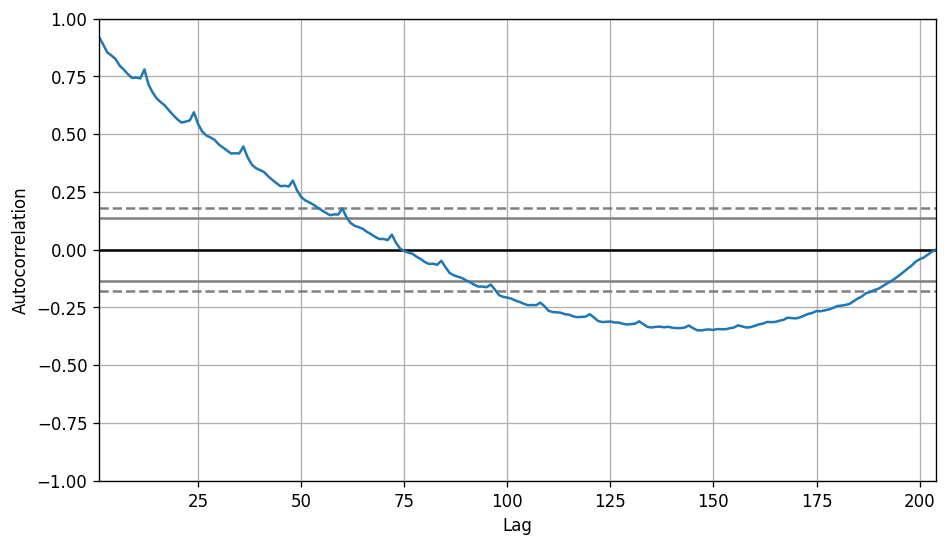

In [46]:
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

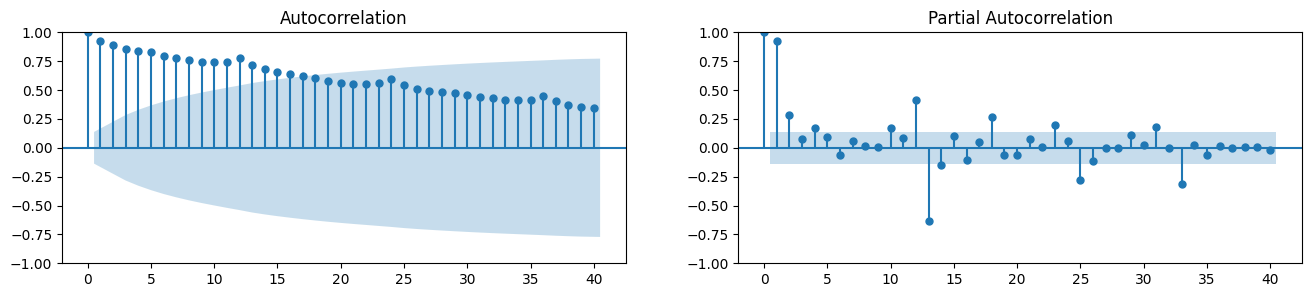

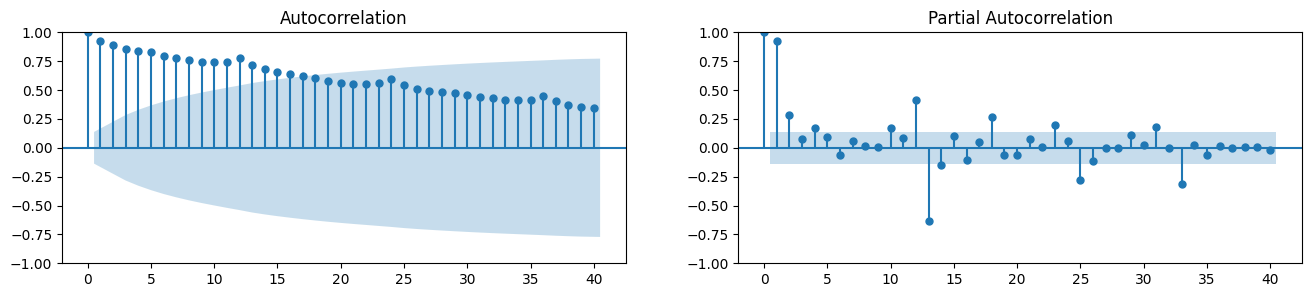

In [48]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=40, ax=axes[0])
plot_pacf(df.value.tolist(), lags=40, ax=axes[1])

### Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

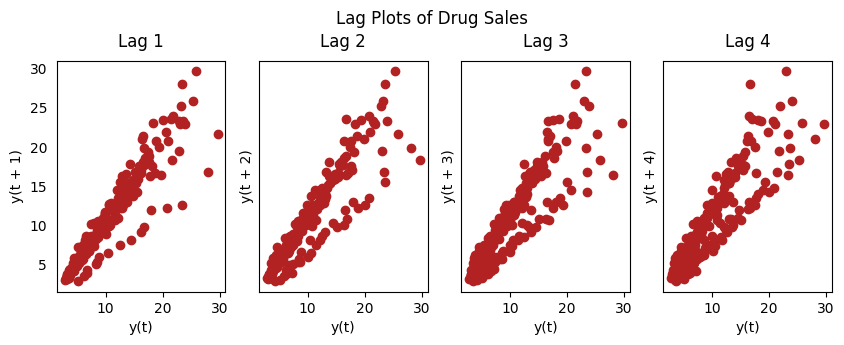

In [50]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

### Estimate the Forecastability

The more regular and repeatable patterns a time series has, the easier it is to forecast. The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

In [51]:
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df.value, m=2, r=0.2*np.std(df.value)))   
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small)))
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))    

0.5374775224973489
0.16083502693096996
0.5972926771842966


In [54]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(df.value, m=2, r=0.2*np.std(df.value)))    
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small))) 
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      

0.41887013457621214
inf
2.0794415416798357


/var/folders/vt/10z3pk5n06vgby_lx927m_6w0000gp/T/ipykernel_89919/1006523556.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


### Smoothen Time Series

- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better

- Take a moving average
- Do a LOESS smoothing (Localized Regression)
- Do a LOWESS smoothing (Locally Weighted Regression)

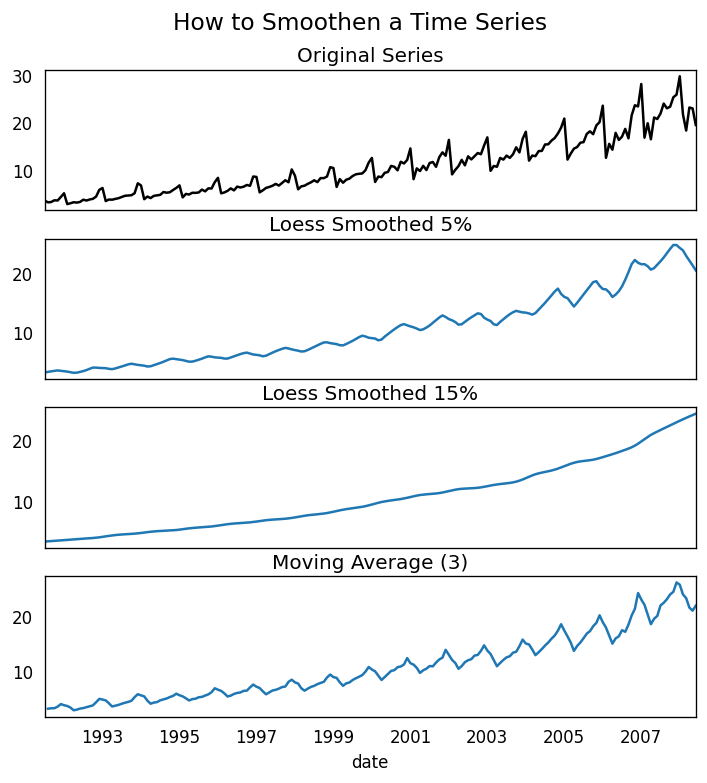

In [56]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df_orig = df
# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

### Granger Casualty Test

Granger causality test is used to determine if one time series will be useful to forecast another.

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

In the above case, the P-Values are Zero for all tests. So the ‘month’ indeed can be used to forecast the Air Passengers.

In [59]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('/Users/mcardonasanchez/Desktop/Online Courses/The-Data-Science-Course-2021-All-Resources/Other/data/a10.csv', parse_dates=['date'])

df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.779674835573545, 3.6614258713531555e-12, 200.0, 1),
   'ssr_chi2test': (55.60136995810715, 8.876175235021739e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557367, 3.661425871352945e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.69891799873244, 1.9133235086856426e-42, 197.0, 2),
   'ssr_chi2test': (333.6566643222736, 3.526760088127763e-73, 2),
   'lrtest': (196.9955927718221, 1.670900349911483e-43, 2),
   'params_ftest': (162.6989179987326, 1.913323508685504e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}